In [4]:
import numpy as np
import matplotlib.pyplot as plt

$$\text{diag}(A) = \mathbb{E}_z\left[z \odot Az\right] \approx \frac{1}{m}\sum_{i=1}^m z_i \odot A z $$

In [5]:
def get_diagonal_hutchinson(apply_A, N, num_samples):
    dd = np.zeros((N, num_samples))
    for k in range(num_samples):
        z = np.random.randn(N)
#         z = np.random.choice([-1,1], N)
        dd[:,k] = z * apply_A(z)

    d = np.mean(dd, axis=-1)
    return d

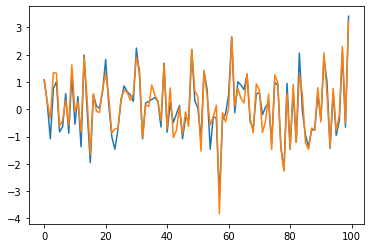

In [6]:
N = 100
num_samples = 1000
A = np.random.randn(N,N)

d = get_diagonal_hutchinson(lambda x: np.dot(A,x), N, num_samples)
d_true = np.diagonal(A)

plt.plot(d)
plt.plot(d_true)

$$M := (\Delta + \rho I)^{-1}$$

ratio_min= -24.45905776645312
ratio_max= 5.570133256689876


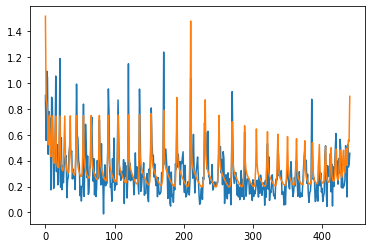

In [15]:
from fenics import *

num_samples = 25
n = 20
rho=1e2
mesh = UnitSquareMesh(n,n)
V = FunctionSpace(mesh, 'CG', 1)
u_trial = TrialFunction(V)
v_test = TestFunction(V)
k = Expression('1 + x[0] + x[0]*x[1]', degree=5, domain=mesh)
A = assemble(inner(k * grad(u_trial), grad(v_test))*dx + rho*u_trial*v_test*dx)

A_array = A.array()
iA_array = np.linalg.inv(A_array)
    
d = get_diagonal_hutchinson(lambda x: np.dot(iA_array, x), V.dim(), num_samples)
d_true = iA_array.diagonal()

plt.plot(d)
plt.plot(d_true)

ratio_min = np.min(d_true / d)
ratio_max = np.max(d_true / d)

print('ratio_min=', ratio_min)
print('ratio_max=', ratio_max)

In [43]:
V.dim()

441

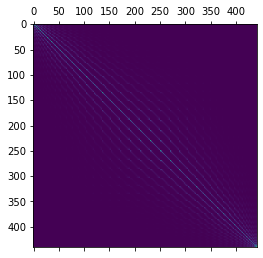

In [13]:
plt.matshow(iA_array)